# K - Nearest Neighbors

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
import copy

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
df = pd.read_csv("census_covid_cat_final.csv")

# Target Variable 'Death Rate Categories'

In [17]:
X = df.iloc[:, 4:-7] # Features is all columns in the dataframe except the last 6 columns
Y = df.iloc[:, -1] # Target is the last column in the dataframe: ''

In [18]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019)

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[320  39  31   0   0   0]
 [ 51  92  54   5   1   0]
 [ 81  78  53  10   6   0]
 [ 24  31  27   5   2   0]
 [ 11   1  10   4   1   0]
 [  2   0   2   1   0   0]]
              precision    recall  f1-score   support

           0       0.65      0.82      0.73       390
           1       0.38      0.45      0.41       203
           2       0.30      0.23      0.26       228
           3       0.20      0.06      0.09        89
           4       0.10      0.04      0.05        27
           5       0.00      0.00      0.00         5

    accuracy                           0.50       942
   macro avg       0.27      0.27      0.26       942
weighted avg       0.45      0.50      0.46       942



/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

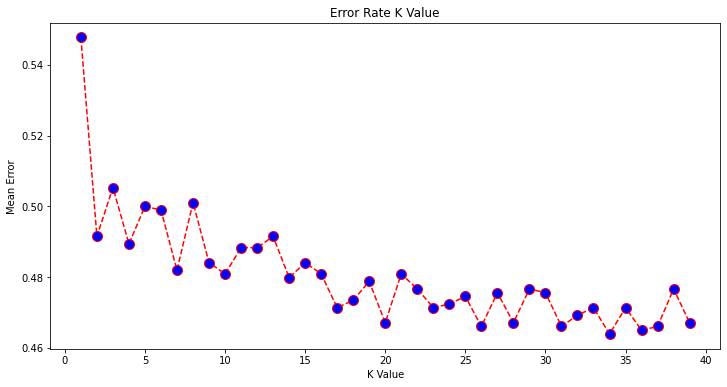

In [24]:
# source: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Target Variable 'Case Rate Categories'

In [26]:
# drop Death Rate Categories -- need Case Rate Categories to be the target variable
df2 = df.iloc[:, :-1]

In [27]:
X = df2.iloc[:, 4:-7] # Features is all columns in the dataframe except the last 6 columns
Y = df2.iloc[:, -1] # Target is the last column in the dataframe: 'Case Rate Categories'

In [28]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019)

In [29]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  9  30   0   1   0   0]
 [ 19 310  99   2   0   1]
 [  5 183 146  16   1   1]
 [  0  22  46   7   0   0]
 [  0   8  15   0   0   0]
 [  0   7   9   4   0   1]]
              precision    recall  f1-score   support

           0       0.27      0.23      0.25        40
           1       0.55      0.72      0.63       431
           2       0.46      0.41      0.44       352
           3       0.23      0.09      0.13        75
           4       0.00      0.00      0.00        23
           5       0.33      0.05      0.08        21

    accuracy                           0.50       942
   macro avg       0.31      0.25      0.25       942
weighted avg       0.46      0.50      0.47       942



In [33]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

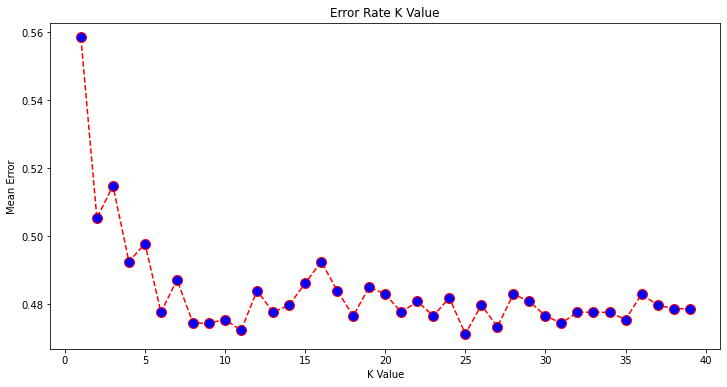

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')